# Accidental Drug Deaths in Connecticut: 
## Step 2 Anaylsis 
## Quetions, Steps, Code, Comments 
### Are opioid-related drug deaths increasing in CT from 2012-2020? 

#### The Data: https://catalog.data.gov/dataset/accidental-drug-related-deaths-2012-2018

# Questions: 
* How many drug-related deaths were there from 2012-2020?
* What is the distribution of opioid deaths by city in CT?
* Has the number of opioid-related deaths increased or decreased from 2012-2020?

# Steps: 

* Step 1: Load the data 
* Step 2: Create an opioid filter to only look at the deaths that are due to opioids
* Step 3: Count the number of rows in the opioid filter to determine how many deaths from 2012-2020 were due to opioids 
* Step 4: Combine the opioid filter with the Residence City and use the value counts function to determine which cities have the highest opioid related deaths and which have the lowest. 
* Step 5: Create a year column. 
* Step 6: Create a filter for each year from 2012 to 2020 to determine if the number of opioid-related deaths have incrased or decreased over the years. 
* Step 7: Look at heroin deaths over time to see if illegal opioid deaths have also been increasing. 

# Code: 

In [1]:
# Step 1: Load the Data
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import geopandas as gpd

accidental_drug_deaths_df = pd.read_csv('../data/accidental_drug_deaths_CT_clean.csv')
accidental_drug_deaths_df

,ID,Date,Age,Sex,Race,Residence_City,Residence_County,Residence_State,Death_City,Death_County,...,Morphine_Not_Heroin,Hydromorphone,Xylazine,Other,Opiate_NOS,Any_Opioid,Manner_of_Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,12-0187,2012-07-17,34.0,Female,White,MAHOPAC,PUTNAM,NaN,DANBURY,FAIRFIELD,...,NaN,NaN,NaN,Duster,NaN,NaN,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"CT\n(41.575155, -72.738288)"
1,12-0258,2012-10-01,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,MIDDLESEX,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)"
2,13-0146,2013-04-28,28.0,Male,White,NaN,NaN,NaN,HARTFORD,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
3,14-0150,2014-04-06,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,LITCHFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)"
4,14-0183,2014-04-27,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,14-0128,2014-03-20,25.0,Male,White,MILFORD,NaN,NaN,WETHERSFIELD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"WETHERSFIELD, CT\n(41.712487, -72.663607)","MILFORD, CT\n(41.224276, -73.057564)","CT\n(41.575155, -72.738288)"
7675,20-1217,2020-11-19,62.0,Female,White,STAMFORD,FAIRFIELD,CT,STAMFORD,FAIRFIELD,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Stamford, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)"
7676,20-1138,2020-10-31,50.0,Female,White,NEW BRITAIN,HARTFORD,CT,NEW BRITAIN,HARTFORD,...,NaN,NaN,Y,NaN,NaN,Y,Accident,"New Britain, CT\n(41.667528, -72.783437)","NEW BRITAIN, CT\n(41.667528, -72.783437)","NEW BRITAIN, CT\n(41.667528, -72.783437)"
7677,16-0640,2016-09-17,36.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)"


In [3]:
# Step 2: Create an opioid filter 
# Note: Using the 'Any_Opioid' filter did not work since the data was not updated in this column and there was a lot of data missing. 
# Therefore, I will create my own 'all_opioid' column to include all of the drugs that are considered opioids. 
# Now I will create filters for all of the different opioids in this data set
heroin_filter = accidental_drug_deaths_df['Heroin'] == 'Y'
fetanyl_filter = accidental_drug_deaths_df['Fentanyl'] == 'Y'
fentanyl_analogue_filter = accidental_drug_deaths_df['Fentanyl_Analogue'] == 'Y'
oxycodone_filter = accidental_drug_deaths_df['Oxycodone'] == 'Y'
oxymorphone_filter = accidental_drug_deaths_df['Oxymorphone'] == 'Y'
hydrocodone_filter = accidental_drug_deaths_df['Hydrocodone'] == 'Y'
morphine_filter = accidental_drug_deaths_df['Morphine_Not_Heroin'] == 'Y'
hydromorphone_filter = accidental_drug_deaths_df['Hydromorphone'] == 'Y'
opiate_filter = accidental_drug_deaths_df['Opiate_NOS'] == 'Y'

In [4]:
# Now I will add a column that incorporates all of these filters

all_opioids_filter = heroin_filter | fetanyl_filter | fentanyl_analogue_filter | oxycodone_filter | oxymorphone_filter | hydrocodone_filter | morphine_filter | hydromorphone_filter | opiate_filter

# now create a new column 'all_opioids' with True/False
accidental_drug_deaths_df['all_opioids'] = all_opioids_filter

In [5]:
# Now I will create a new data frame that contains the new all_opioids column. 

opioid_filter = accidental_drug_deaths_df['all_opioids']

accidental_opioid_deaths_df = accidental_drug_deaths_df[opioid_filter]

In [6]:
# check the shape of the two data frames
print('All drug deaths', accidental_drug_deaths_df.shape)

print('Opioid drug deaths', accidental_opioid_deaths_df.shape)

All drug deaths (7679, 41)
Opioid drug deaths (6572, 41)


In total there was 7679 drug related deaths from 2012-2020. Out of those 7679 deaths, 6572 of them were a result of an opioid. That means 85% of all drug related deaths in CT from 2012-2020 were opioid related. 

### Step 3: Count the number of rows

* Since there are 6572 rows in the opioid filtered dataframe, which only contains the rows of people who died via an opioid, and there are a total of 7679 in the bigger dataframe, this means that most of the overdoses from January 1, 2012 - December 31, 2020 were due to opioids.

In [8]:
# Step 4: Distribution of opioid deaths by city
accidental_opioid_deaths_df['Residence_City'].value_counts().head(20)

HARTFORD         417
WATERBURY        371
BRIDGEPORT       304
NEW HAVEN        287
NEW BRITAIN      242
BRISTOL          171
MERIDEN          151
NORWICH          143
TORRINGTON       137
EAST HARTFORD    129
MANCHESTER       128
MIDDLETOWN       111
WEST HAVEN       106
DANBURY          103
NEW LONDON       103
ENFIELD           98
STRATFORD         95
HAMDEN            83
MILFORD           77
STAMFORD          76
Name: Residence_City, dtype: int64

In [9]:
# Step 5: Create a year column

#Change the Date column from strings to dates 
accidental_opioid_deaths_df['Date'] = pd.to_datetime(accidental_opioid_deaths_df['Date'])

#Add a column for year 
accidental_opioid_deaths_df['year'] = accidental_opioid_deaths_df[opioid_filter].Date.dt.year

accidental_opioid_deaths_df

,ID,Date,Age,Sex,Race,Residence_City,Residence_County,Residence_State,Death_City,Death_County,...,Xylazine,Other,Opiate_NOS,Any_Opioid,Manner_of_Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,all_opioids,year
1,12-0258,2012-10-01,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,MIDDLESEX,...,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)",True,2012
2,13-0146,2013-04-28,28.0,Male,White,NaN,NaN,NaN,HARTFORD,HARTFORD,...,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",True,2013
3,14-0150,2014-04-06,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,LITCHFIELD,...,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)",True,2014
4,14-0183,2014-04-27,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,NEW LONDON,...,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)",True,2014
6,15-0052,2015-02-01,52.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,MIDDLESEX,...,NaN,NaN,NaN,Y,Accident,"MIDDLETOWN, CT\n(41.544654, -72.651713)","MIDDLETOWN, CT\n(41.544654, -72.651713)","CT\n(41.575155, -72.738288)",True,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,14-0128,2014-03-20,25.0,Male,White,MILFORD,NaN,NaN,WETHERSFIELD,NaN,...,NaN,NaN,NaN,NaN,Accident,"WETHERSFIELD, CT\n(41.712487, -72.663607)","MILFORD, CT\n(41.224276, -73.057564)","CT\n(41.575155, -72.738288)",True,2014
7675,20-1217,2020-11-19,62.0,Female,White,STAMFORD,FAIRFIELD,CT,STAMFORD,FAIRFIELD,...,NaN,NaN,NaN,Y,Accident,"Stamford, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)",True,2020
7676,20-1138,2020-10-31,50.0,Female,White,NEW BRITAIN,HARTFORD,CT,NEW BRITAIN,HARTFORD,...,Y,NaN,NaN,Y,Accident,"New Britain, CT\n(41.667528, -72.783437)","NEW BRITAIN, CT\n(41.667528, -72.783437)","NEW BRITAIN, CT\n(41.667528, -72.783437)",True,2020
7677,16-0640,2016-09-17,36.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,NaN,NaN,Y,Accident,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)",True,2016


In [10]:
# distribution by year
accidental_opioid_deaths_df.groupby('year').size()

year
2012     257
2013     356
2014     449
2015     593
2016     803
2017     898
2018     901
2019    1091
2020    1224
dtype: int64

In [11]:
# load yearly data into new df
cols1 = ['year', 'all_opioids']
opi_years = accidental_opioid_deaths_df[cols1].groupby('year').sum().round()
opi_years

,all_opioids
year,
2012,257
2013,356
2014,449
2015,593
2016,803
2017,898
2018,901
2019,1091
2020,1224


Text(0.5, 1.0, 'CT Opioid Deaths from 2012-2020')

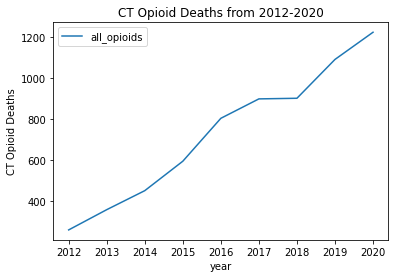

In [12]:
# plot the amount of opioid deaths per year
opi_years.plot()
plt.ylabel('CT Opioid Deaths')
plt.title('CT Opioid Deaths from 2012-2020')

Next we can look at the percent change from year to year. 

In [13]:
# clearly increasing

# you can quantify the rate year by year with the pct_change function
# so 2016 is a 29.4% increase over 2015

accidental_opioid_deaths_df.groupby('year').size().pct_change()

year
2012         NaN
2013    0.385214
2014    0.261236
2015    0.320713
2016    0.354132
2017    0.118306
2018    0.003341
2019    0.210877
2020    0.121907
dtype: float64

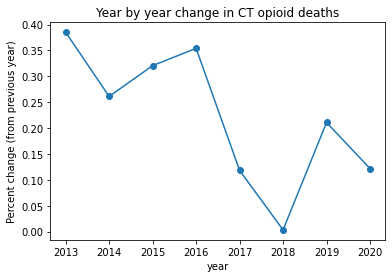

In [14]:
deaths_year_pct_change=accidental_opioid_deaths_df.groupby('year').size().pct_change()

deaths_year_pct_change.plot(style='-o')
plt.title('Year by year change in CT opioid deaths')
plt.ylabel('Percent change (from previous year)')
plt.show()

From the above cell, we can see there is an increase of between 11% to 18% from 2018-2020. 

Next I want to look at just the heroin deaths. Since we already know from previous data sets that legal opioid prescriptions are decreasing but opioid deaths are still increasing, it would be interesting to look at illegal opioid deaths. Therefore, I focused on heroin, an illegal opioid. 

In [42]:
#Change the Date column from strings to dates 
accidental_drug_deaths_df['Date'] = pd.to_datetime(accidental_drug_deaths_df['Date'])

#Add a column for year 
accidental_drug_deaths_df['year'] = accidental_drug_deaths_df[heroin_filter].Date.dt.year
accidental_drug_deaths_df

,ID,Date,Age,Sex,Race,Residence_City,Residence_County,Residence_State,Death_City,Death_County,...,Xylazine,Other,Opiate_NOS,Any_Opioid,Manner_of_Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,all_opioids,year
0,12-0187,2012-07-17,34.0,Female,White,MAHOPAC,PUTNAM,NaN,DANBURY,FAIRFIELD,...,NaN,Duster,NaN,NaN,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"CT\n(41.575155, -72.738288)",False,NaN
1,12-0258,2012-10-01,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,MIDDLESEX,...,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)",True,2012.0
2,13-0146,2013-04-28,28.0,Male,White,NaN,NaN,NaN,HARTFORD,HARTFORD,...,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",True,2013.0
3,14-0150,2014-04-06,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,LITCHFIELD,...,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)",True,2014.0
4,14-0183,2014-04-27,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,NEW LONDON,...,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)",True,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,14-0128,2014-03-20,25.0,Male,White,MILFORD,NaN,NaN,WETHERSFIELD,NaN,...,NaN,NaN,NaN,NaN,Accident,"WETHERSFIELD, CT\n(41.712487, -72.663607)","MILFORD, CT\n(41.224276, -73.057564)","CT\n(41.575155, -72.738288)",True,2014.0
7675,20-1217,2020-11-19,62.0,Female,White,STAMFORD,FAIRFIELD,CT,STAMFORD,FAIRFIELD,...,NaN,NaN,NaN,Y,Accident,"Stamford, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)",True,2020.0
7676,20-1138,2020-10-31,50.0,Female,White,NEW BRITAIN,HARTFORD,CT,NEW BRITAIN,HARTFORD,...,Y,NaN,NaN,Y,Accident,"New Britain, CT\n(41.667528, -72.783437)","NEW BRITAIN, CT\n(41.667528, -72.783437)","NEW BRITAIN, CT\n(41.667528, -72.783437)",True,NaN
7677,16-0640,2016-09-17,36.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,NaN,NaN,Y,Accident,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)",True,2016.0


In [36]:
accidental_heroin_deaths_df = accidental_drug_deaths_df[heroin_filter]
accidental_heroin_deaths_df

,ID,Date,Age,Sex,Race,Residence_City,Residence_County,Residence_State,Death_City,Death_County,...,Xylazine,Other,Opiate_NOS,Any_Opioid,Manner_of_Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,all_opioids,year
1,12-0258,2012-10-01,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,MIDDLESEX,...,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)",True,2012.0
2,13-0146,2013-04-28,28.0,Male,White,NaN,NaN,NaN,HARTFORD,HARTFORD,...,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",True,2013.0
3,14-0150,2014-04-06,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,LITCHFIELD,...,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)",True,2014.0
4,14-0183,2014-04-27,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,NEW LONDON,...,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)",True,2014.0
6,15-0052,2015-02-01,52.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,MIDDLESEX,...,NaN,NaN,NaN,Y,Accident,"MIDDLETOWN, CT\n(41.544654, -72.651713)","MIDDLETOWN, CT\n(41.544654, -72.651713)","CT\n(41.575155, -72.738288)",True,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,16-0524,2016-08-02,44.0,Male,"Hispanic, White",HARTFORD,HARTFORD,CT,HARTFORD,NaN,...,NaN,BUPREN,NaN,Y,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)",True,2016.0
7673,18-0648,2018-08-18,51.0,Female,Black,WATERBURY,NEW HAVEN,CT,HARTFORD,HARTFORD,...,NaN,NaN,NaN,Y,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","WATERBURY, CT\n(41.554261, -73.043069)","HARTFORD, CT\n(41.765775, -72.673356)",True,2018.0
7674,14-0128,2014-03-20,25.0,Male,White,MILFORD,NaN,NaN,WETHERSFIELD,NaN,...,NaN,NaN,NaN,NaN,Accident,"WETHERSFIELD, CT\n(41.712487, -72.663607)","MILFORD, CT\n(41.224276, -73.057564)","CT\n(41.575155, -72.738288)",True,2014.0
7675,20-1217,2020-11-19,62.0,Female,White,STAMFORD,FAIRFIELD,CT,STAMFORD,FAIRFIELD,...,NaN,NaN,NaN,Y,Accident,"Stamford, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)",True,2020.0


In [31]:
accidental_drug_deaths_df.value_counts('Heroin')

Heroin
Y    3178
dtype: int64

Out of the 6572 opioid deaths, 3178 of them were from heroin. This is an extremely high amount of illegal opioid deaths. 

Next, I want to look at heroin deaths by year to see which patterns emerge. 

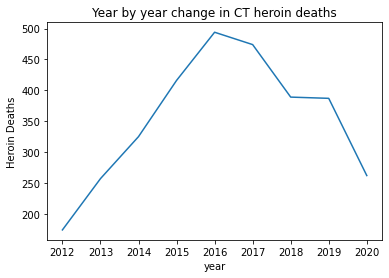

In [44]:
accidental_heroin_deaths_df.groupby('year').size().plot()
plt.title('Year by year change in CT heroin deaths')
plt.ylabel('Heroin Deaths')
plt.show()

It looks like heroin deaths were steeply increasing from 2012 to 2016, then began to decrease until 2018, then plateued until 2012, and then decreases again in 2020. 

# Answer

From this dataset anaylsis, it is clear that the amount of opioid-related deaths have increased over the past decade. Hartforn, Waterbury, Bridgeport, and New Haven report the most amount of opioid-related deaths in CT. The percent changr from year to year from 2012-2020 is not consistent. Additionally, heroin deaths make up a large amount of all opioid related deaths. The amount the heroin deaths increased from 2012 to 2016, but then begin to decrease. 


# Interpretation/Observation

Overall, I am not surprised that the amount of opioid deaths have increased. However, considering our other data set that shows that the amount of opioid prescriptions is decreasing, this is an interesting result. Therefore, it makes sense that heroin, an illegal opioid, increased from 2012-2016. I am a little bit confused by the fact that heroin deaths have decreased from 2016-2020. 